# Step 1: Reading and Understanding the Data


Let's start with the following steps:

    1. Importing data using the pandas library
    2. Understanding the structure of the data

In [1]:
# Import the required libraries:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Read the given CSV file:

day = pd.read_csv("day.csv")

In [3]:
day.head(700)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        1           1   
1          2  02-01-2018       1   0     1        0        2           1   
2          3  03-01-2018       1   0     1        0        3           1   
3          4  04-01-2018       1   0     1        0        4           1   
4          5  05-01-2018       1   0     1        0        5           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
695      696  27-11-2019       4   1    11        0        3           1   
696      697  28-11-2019       4   1    11        0        4           1   
697      698  29-11-2019       4   1    11        0        5           1   
698      699  30-11-2019       4   1    11        0        6           0   
699      700  01-12-2019       4   1    12        0        0           0   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
0             2  14.110847  18.18125  80.5833  10.749882     331         654   
1             2  14.902598  17.68695  69.6087  16.652113     131         670   
2             1   8.050924   9.47025  43.7273  16.636703     120        1229   
3             1   8.200000  10.60610  59.0435  10.739832     108        1454   
4             1   9.305237  11.46350  43.6957  12.522300      82        1518   
..          ...        ...       ...      ...        ...     ...         ...   
695           2  11.958347  14.07790  78.6667  15.916654     123        3836   
696           1  12.163347  14.48810  50.6250  14.125007     198        5062   
697           1  11.515670  14.92110  55.5652   7.739974     243        5080   
698           1  12.231653  16.19335  64.9583   3.917544     362        5306   
699           2  12.231653  15.84520  80.6667   4.000181     951        4240   

      cnt  
0     985  
1     801  
2    1349  
3    1562  
4    1600  
..    ...  
695  3959  
696  5260  
697  5323  
698  5668  
699  5191  

[700 rows x 16 columns]

Let's inspect the various aspects of our dataframe

In [4]:
#Determining the number of rows and columns
day.shape

(730, 16)

In [5]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
#Checking missing values
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

No missing values in the data set "Day"

In [7]:
#summary of all the numeric columns in the dataset
day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [8]:
#Datatypes of each column
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Have to convert all int64 as Object.. because they cannot interpreted as numericals but are categorical lday


In [9]:
#Rename the columns for better understanding
day.rename(columns = {'yr':'Year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
day.head()

instant      dteday  season  Year  month  holiday  weekday  workingday  \
0        1  01-01-2018       1     0      1        0        1           1   
1        2  02-01-2018       1     0      1        0        2           1   
2        3  03-01-2018       1     0      1        0        3           1   
3        4  04-01-2018       1     0      1        0        4           1   
4        5  05-01-2018       1     0      1        0        5           1   

   weathersit       temp     atemp  humidity  windspeed  casual  registered  \
0           2  14.110847  18.18125   80.5833  10.749882     331         654   
1           2  14.902598  17.68695   69.6087  16.652113     131         670   
2           1   8.050924   9.47025   43.7273  16.636703     120        1229   
3           1   8.200000  10.60610   59.0435  10.739832     108        1454   
4           1   9.305237  11.46350   43.6957  12.522300      82        1518   

   count  
0    985  
1    801  
2   1349  
3   1562  
4   1600

Mapping Required Variables for better data understanding

In [10]:
day['season'].value_counts()


3    188
2    184
1    180
4    178
Name: season, dtype: int64

Mapping of Variable Season

In [11]:
def ass_season(x):
    if x==1:
        return 'Spring'
    elif x==2:
        return 'Summer'
    elif x==3:
        return 'Fall'
    else:
        return 'Winter'
    
    
day['season'] = day['season'].apply(ass_season)
        

In [12]:
day['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

For Month Column:

In [13]:
def ass_mnth(x):
    return x.map({
        1:'Jan',
        2:'Feb',
        3:'Mar',
        4:'Apr',
        5:'May',
        6:'Jun',
        7:'Jul',
        8:'Aug',
        9:'Sep',
        10:'Oct',
        11:'Nov',
        12:'Dec'        
    })

day[['month']] = day[['month']].apply(ass_mnth)

In [14]:
day['month'].value_counts()

Aug    62
Oct    62
Jul    62
Jan    62
Dec    62
Mar    62
May    62
Nov    60
Apr    60
Sep    60
Jun    60
Feb    56
Name: month, dtype: int64

For Year Column:

In [15]:
day['Year'].value_counts()

1    365
0    365
Name: Year, dtype: int64

In [16]:
def ass_year(y):
    return y.map({
        0:'2018',
        1:'2019'})

day[['Year']] = day[['Year']].apply(ass_year)

In [17]:
day['Year'].value_counts()

2019    365
2018    365
Name: Year, dtype: int64

For Holiday Column:


In [18]:
day['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [19]:
def ass_hol(x):
    return x.map({
        0:'Working Day',
        1:'Holiday'})

day[['holiday']] = day[['holiday']].apply(ass_hol)

In [20]:
day['holiday'].value_counts()

Working Day    709
Holiday         21
Name: holiday, dtype: int64

For WeekDay Column:

In [21]:
day['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [22]:
def ass_week(x):
    return x.map({
        0:'Sun',
        1:'Mon',
        2:'Tue',
        3:'Wed',
        4:'Thu',
        5:'Fri',
        6:'Sat',
                
    })

day[['weekday']] = day[['weekday']].apply(ass_week)

In [23]:
day['weekday'].value_counts()

Tue    105
Mon    105
Wed    104
Fri    104
Sun    104
Thu    104
Sat    104
Name: weekday, dtype: int64

For Working Day Column: (Within the Organziation)

In [24]:
day['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [25]:
def ass_work(x):
    return x.map({
        1:'Working Day',
        0:'Office Holiday',
                
    })

day[['workingday']] = day[['workingday']].apply(ass_work)

In [26]:
day['workingday'].value_counts()

Working Day       504
Office Holiday    226
Name: workingday, dtype: int64

For Weather Column:

In [27]:
day['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [28]:
# weathersit : 
#1: Clear, Few clouds, Partly cloudy
#2: Mist, Broken and Few clouds
#3: Snow, + Light Rain with Thunderstorm and Scattered clouds


def ass_weather(x):
    if x==1:
        return 'Clear, Few clouds, Partly cloudy'
    elif x==2:
        return 'Mist, Broken + Few clouds'
    elif x==3:
        return 'Snow + Rain'
    
day['weathersit'] = day['weathersit'].apply(ass_weather)

In [29]:
day['weathersit'].value_counts()

Clear, Few clouds, Partly cloudy    463
Mist, Broken + Few clouds           246
Snow + Rain                          21
Name: weathersit, dtype: int64

# STEP 2: DATA VISUALIZATION

STORING ALL NUMERICAL COLUMNS AS X

In [30]:
num_col = day.describe().columns

In [31]:
num_col

Index(['instant', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [32]:
x = num_col
x

Index(['instant', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

Understanding the Distribution

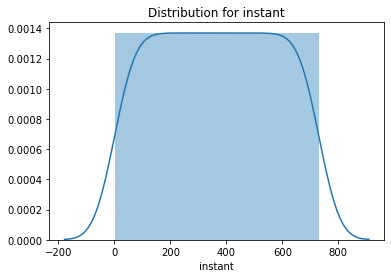

*********


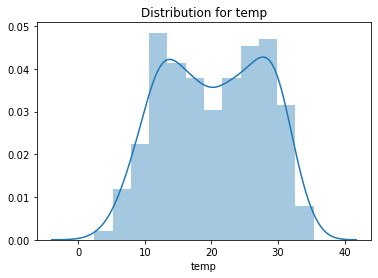

*********


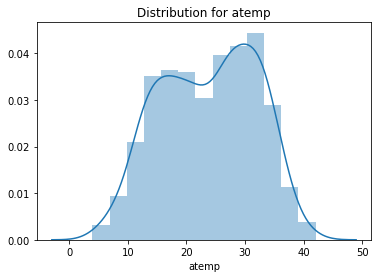

*********


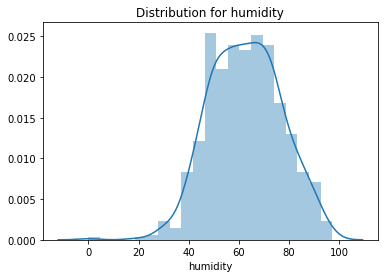

*********


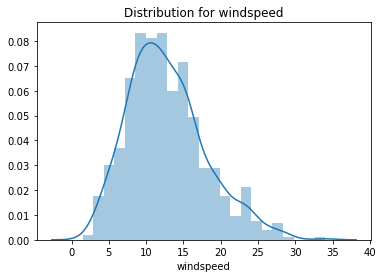

*********


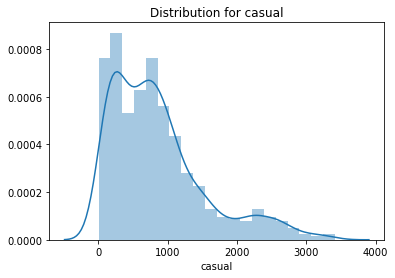

*********


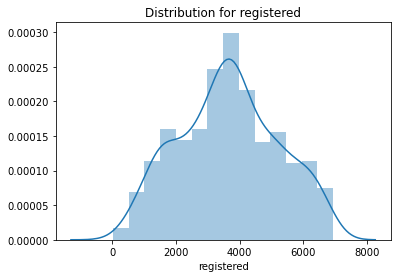

*********


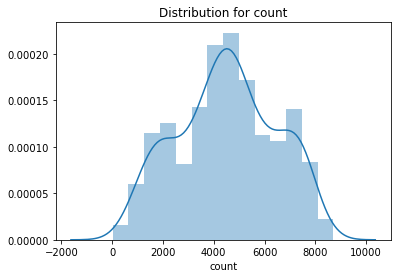

*********


In [33]:
for col in x:
    sns.distplot(day[col])
    plt.title("Distribution for "+col)
    plt.show();
    print("*********")

In [34]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   Year        730 non-null    object 
 4   month       730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [35]:
day['dteday'] = day['dteday'].astype('datetime64')

In [36]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   Year        730 non-null    object        
 4   month       730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  humidity    730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  count       730 non-null    int64         
dtypes: datetime64[ns](1), floa

# Visulaization of All Categorical Columns

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [37]:
day_categorical = day.select_dtypes(include = ['object'])

In [38]:
len(day_categorical.columns)

7

In [39]:
day.select_dtypes(include=['object']).columns

Index(['season', 'Year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

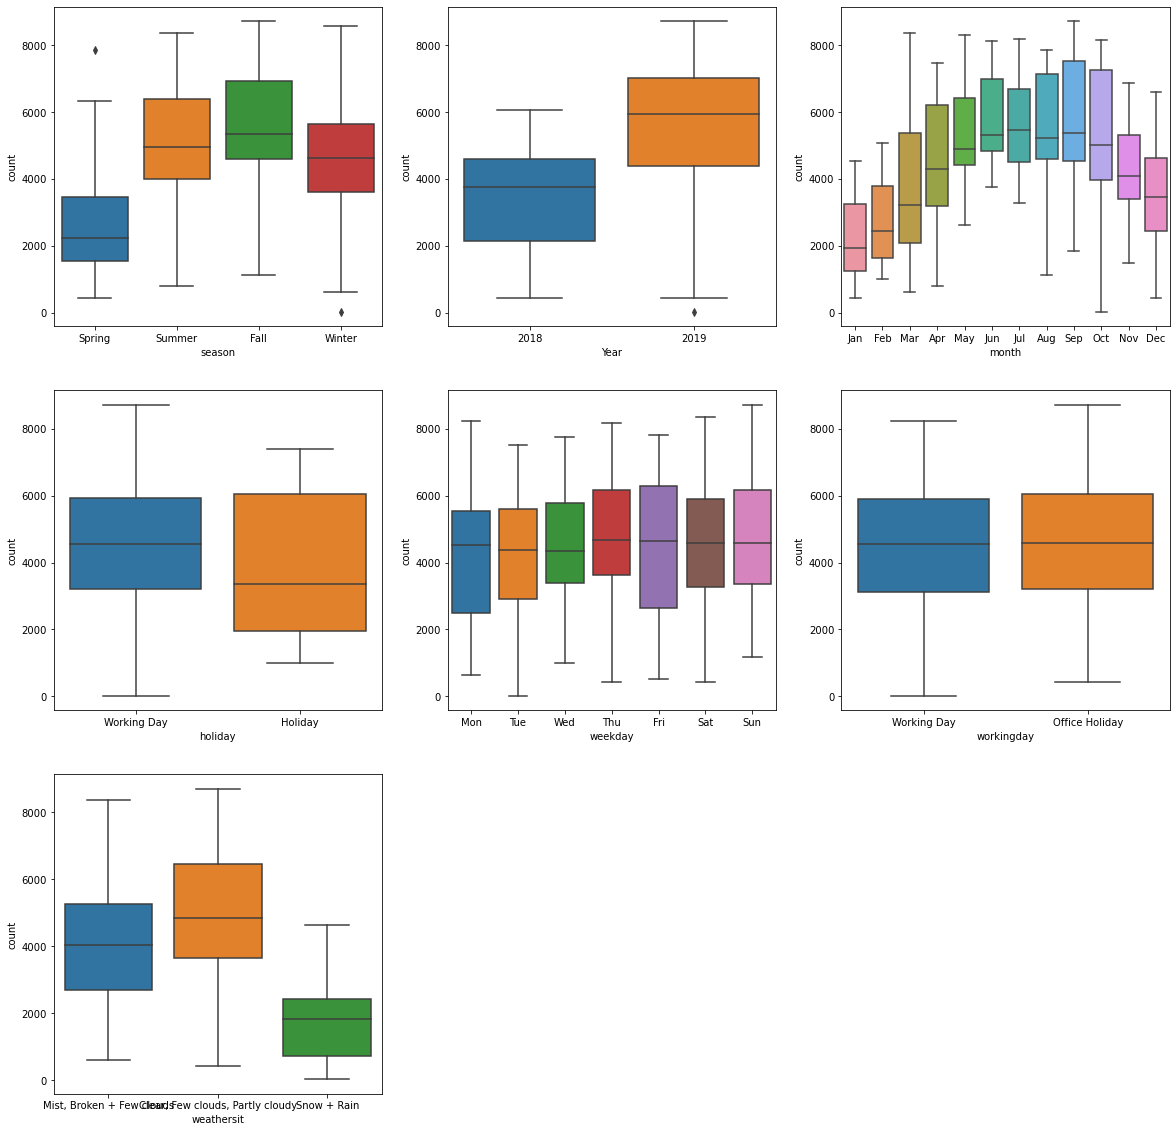

In [40]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='count', data = day)
plt.subplot(3,3,2)
sns.boxplot(x='Year', y='count', data = day)
plt.subplot(3,3,3)
sns.boxplot(x='month', y='count', data = day)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='count', data = day)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='count', data = day)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='count', data = day)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='count', data = day)
plt.show()



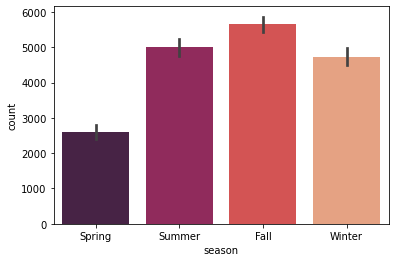

In [41]:
#Barplot to see relation between season and count of bike rentals
sns.barplot('season','count',data=day,palette="rocket",)
plt.show()

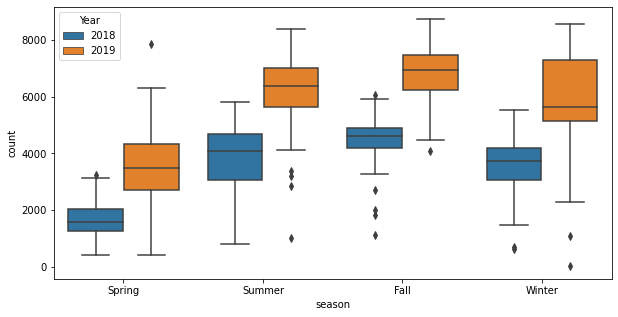

In [42]:
#Just to reconfitm our observation
plt.figure(figsize = (10, 5))
sns.boxplot(x='season', y='count', hue = 'Year', data=day)
plt.show()

Weatherist

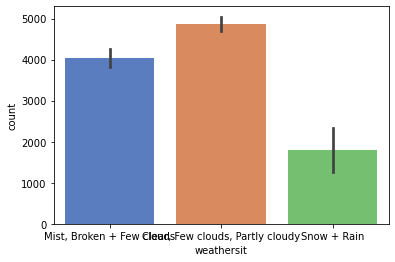

In [43]:
#Relation between weather and count of bike rentals
sns.barplot('weathersit','count',palette="muted",data=day)
plt.show()
           

Weekday

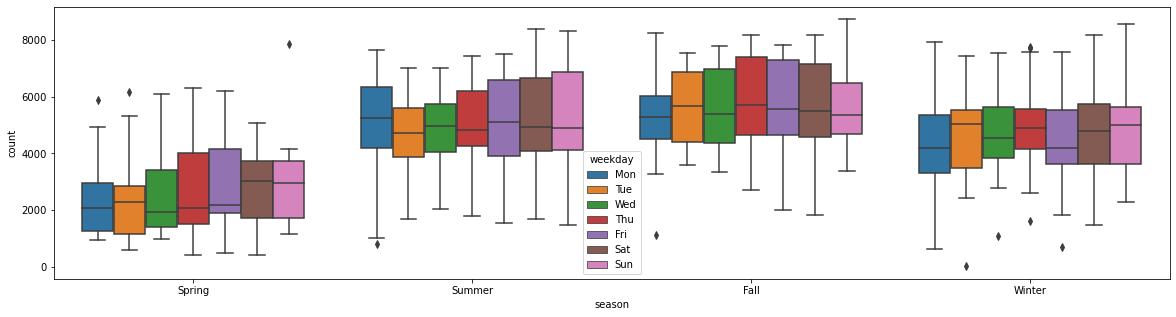

In [44]:
plt.figure(figsize = (20, 5))
sns.boxplot(x='season', y='count', hue = 'weekday', data=day)
plt.show()

Workingday

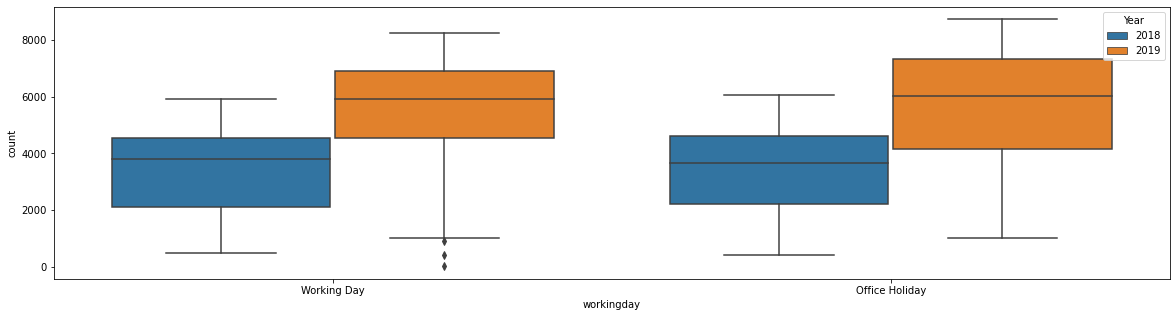

In [45]:
plt.figure(figsize = (20, 5))
sns.boxplot(x='workingday', y='count', hue = 'Year', data=day)
plt.show()

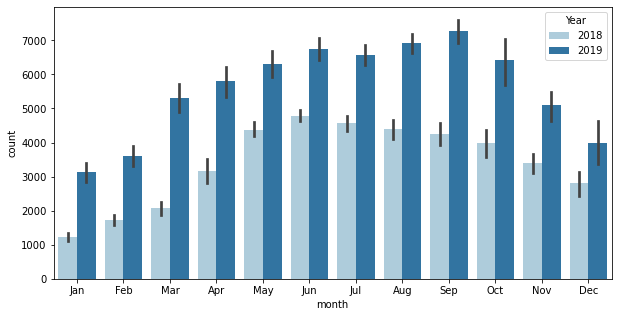

In [46]:
#Relation between month and 
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='Year',data=day, palette='Paired')
plt.show()

Year

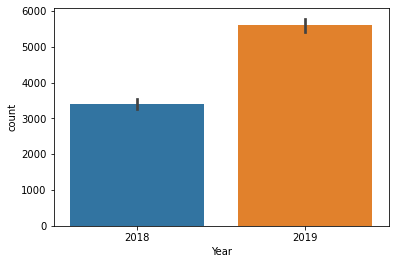

In [47]:
#Relation between Year and count of bike rentals
sns.barplot('Year','count',data=day)
plt.show()

Temperature

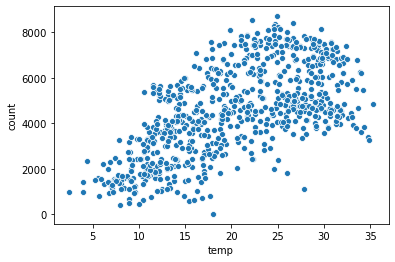

In [48]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='count' ,data=day)
plt.show()

Humidity

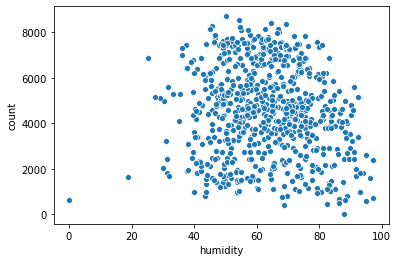

In [49]:
sns.scatterplot(x='humidity', y='count',data=day)
plt.show()

Inference - Bike rentals more at high humidity


In [50]:
#Removing Instant from X (Numerical Columns)

In [51]:
x

Index(['instant', 'temp', 'atemp', 'humidity', 'windspeed', 'casual',
       'registered', 'count'],
      dtype='object')

In [52]:
x = x[1:]
x

Index(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')

In [53]:
day[x].head()

temp     atemp  humidity  windspeed  casual  registered  count
0  14.110847  18.18125   80.5833  10.749882     331         654    985
1  14.902598  17.68695   69.6087  16.652113     131         670    801
2   8.050924   9.47025   43.7273  16.636703     120        1229   1349
3   8.200000  10.60610   59.0435  10.739832     108        1454   1562
4   9.305237  11.46350   43.6957  12.522300      82        1518   1600

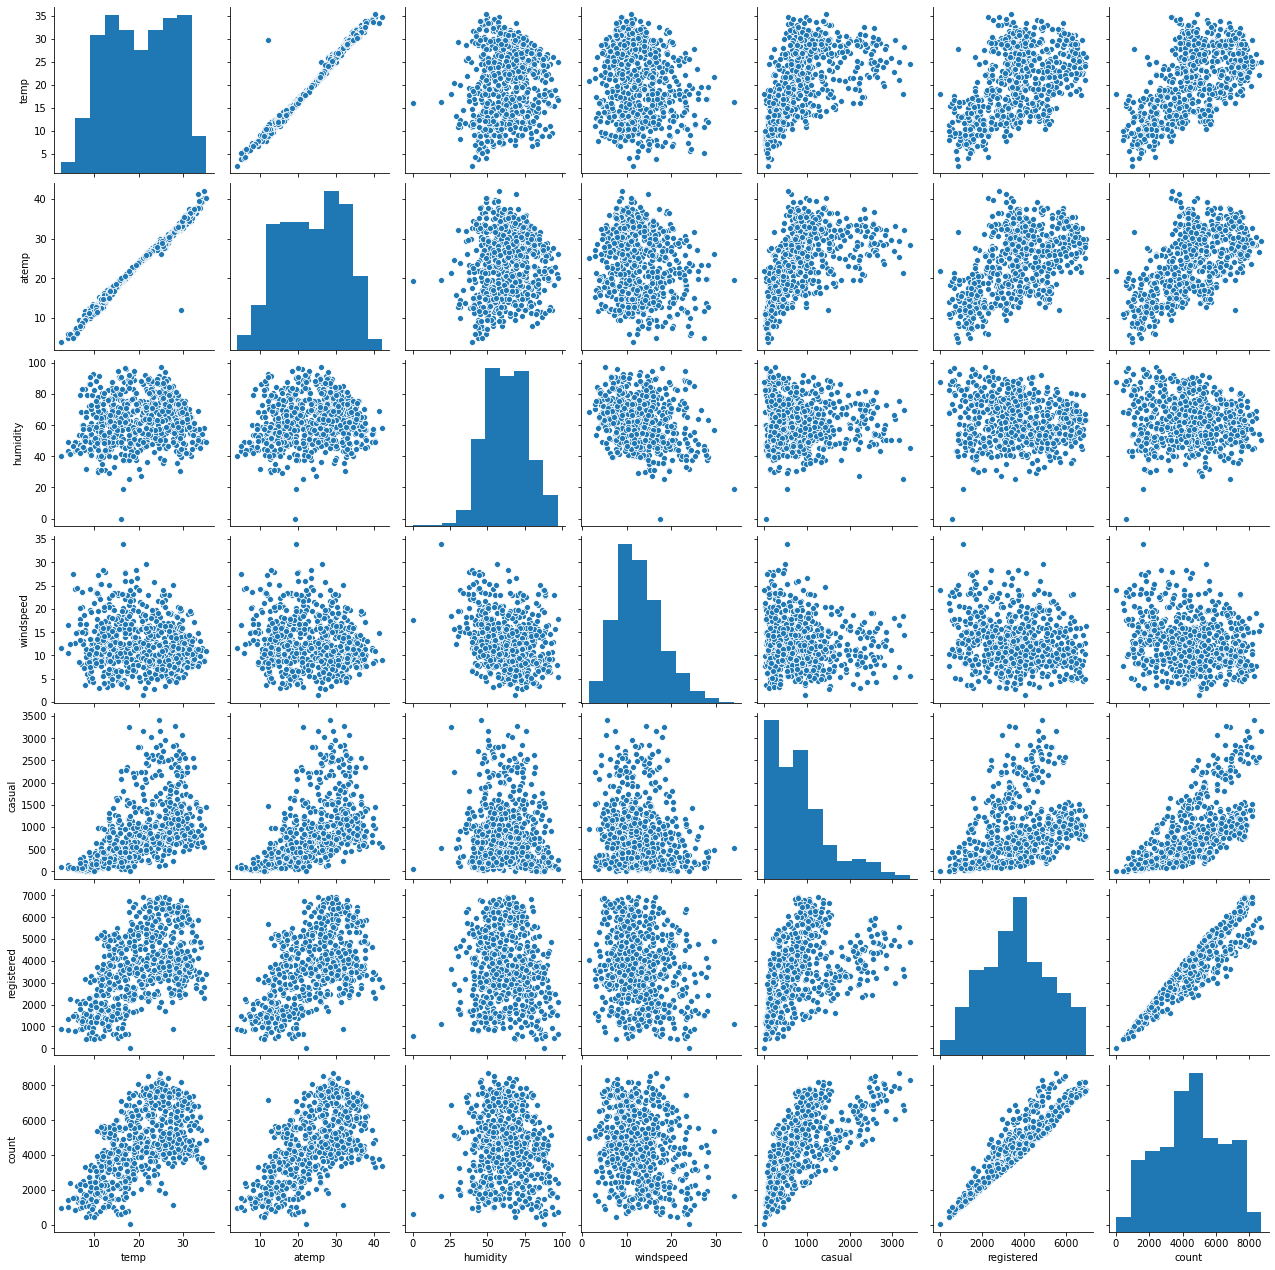

In [54]:
## Analyzing Numerical variables
sns.pairplot(day[x]);

## HeatMap

In [55]:
day[x].corr()

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.991696  0.128565  -0.158186  0.542731    0.539436   
atemp       0.991696  1.000000  0.141512  -0.183876  0.543362    0.543678   
humidity    0.128565  0.141512  1.000000  -0.248506 -0.075211   -0.089212   
windspeed  -0.158186 -0.183876 -0.248506   1.000000 -0.167995   -0.217914   
casual      0.542731  0.543362 -0.075211  -0.167995  1.000000    0.394137   
registered  0.539436  0.543678 -0.089212  -0.217914  0.394137    1.000000   
count       0.627044  0.630685 -0.098543  -0.235132  0.672123    0.945411   

               count  
temp        0.627044  
atemp       0.630685  
humidity   -0.098543  
windspeed  -0.235132  
casual      0.672123  
registered  0.945411  
count       1.000000

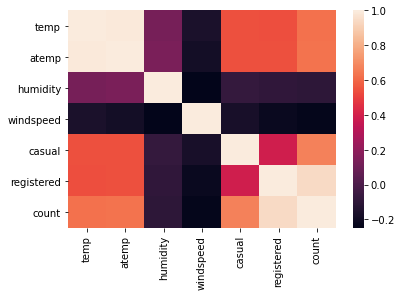

In [56]:
sns.heatmap(day[x].corr());

In [57]:
sns.heatmap(day[x].corr(),annot=True);

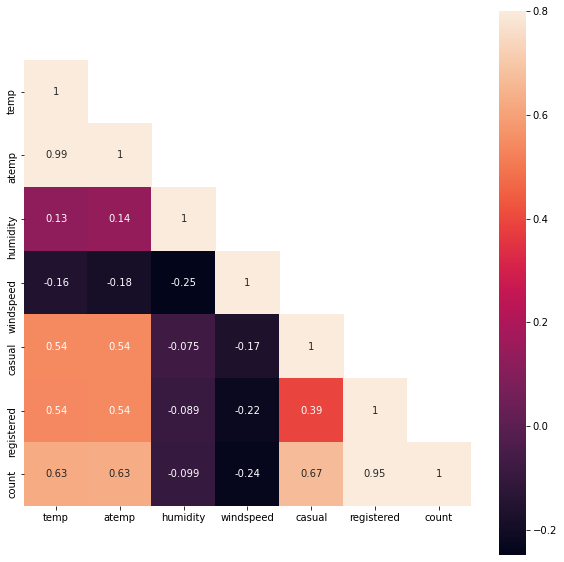

In [58]:
# heatmap
mask = np.array(day[x].corr())
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(day[x].corr(), mask=mask, vmax=0.8, square=True, annot=True);

As is visible from the pairplot and the heatmap, we can see temp, atemp, casual,registered,instant variables are correlated to 'count' variable

We can also see some other variables are also most correlated.
Both the plots above helps to interpret the day well and identify the variables that can turn out to be useful in building the model
So yes we can consider a Linear Regression Model.

In [59]:
day.head()

instant     dteday  season  Year month      holiday weekday   workingday  \
0        1 2018-01-01  Spring  2018   Jan  Working Day     Mon  Working Day   
1        2 2018-02-01  Spring  2018   Jan  Working Day     Tue  Working Day   
2        3 2018-03-01  Spring  2018   Jan  Working Day     Wed  Working Day   
3        4 2018-04-01  Spring  2018   Jan  Working Day     Thu  Working Day   
4        5 2018-05-01  Spring  2018   Jan  Working Day     Fri  Working Day   

                         weathersit       temp     atemp  humidity  windspeed  \
0         Mist, Broken + Few clouds  14.110847  18.18125   80.5833  10.749882   
1         Mist, Broken + Few clouds  14.902598  17.68695   69.6087  16.652113   
2  Clear, Few clouds, Partly cloudy   8.050924   9.47025   43.7273  16.636703   
3  Clear, Few clouds, Partly cloudy   8.200000  10.60610   59.0435  10.739832   
4  Clear, Few clouds, Partly cloudy   9.305237  11.46350   43.6957  12.522300   

   casual  registered  count  
0     331         654    985  
1     131         670    801  
2     120        1229   1349  
3     108        1454   1562  
4      82        1518   1600

In [60]:
#drop unnecessary columns
day=day.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
day.head()
#Removal of Casual and Registered Users, because we need the target variable as 'cnt', becasue cnt tell us the total nunber of users whiich is what's required for our day modelling

season  Year month      holiday weekday   workingday  \
0  Spring  2018   Jan  Working Day     Mon  Working Day   
1  Spring  2018   Jan  Working Day     Tue  Working Day   
2  Spring  2018   Jan  Working Day     Wed  Working Day   
3  Spring  2018   Jan  Working Day     Thu  Working Day   
4  Spring  2018   Jan  Working Day     Fri  Working Day   

                         weathersit       temp  humidity  windspeed  count  
0         Mist, Broken + Few clouds  14.110847   80.5833  10.749882    985  
1         Mist, Broken + Few clouds  14.902598   69.6087  16.652113    801  
2  Clear, Few clouds, Partly cloudy   8.050924   43.7273  16.636703   1349  
3  Clear, Few clouds, Partly cloudy   8.200000   59.0435  10.739832   1562  
4  Clear, Few clouds, Partly cloudy   9.305237   43.6957  12.522300   1600

# STEP 3: DATA PREPARATION

In [61]:
# Select all categorical variables
day_categorical = day.select_dtypes(include=['object'])
day_categorical.columns

Index(['season', 'Year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

### Removing redundant columns when using get_dummies

In [62]:
# One Hot Encoding - convert into dummies

day_dummies = pd.get_dummies(day_categorical,drop_first=True)
day_dummies.head()


season_Spring  season_Summer  season_Winter  Year_2019  month_Aug  \
0              1              0              0          0          0   
1              1              0              0          0          0   
2              1              0              0          0          0   
3              1              0              0          0          0   
4              1              0              0          0          0   

   month_Dec  month_Feb  month_Jan  month_Jul  month_Jun  ...  \
0          0          0          1          0          0  ...   
1          0          0          1          0          0  ...   
2          0          0          1          0          0  ...   
3          0          0          1          0          0  ...   
4          0          0          1          0          0  ...   

   holiday_Working Day  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0                    1            1            0            0            0   
1                    1            0            0            0            0   
2                    1            0            0            0            0   
3                    1            0            0            0            1   
4                    1            0            0            0            0   

   weekday_Tue  weekday_Wed  workingday_Working Day  \
0            0            0                       1   
1            1            0                       1   
2            0            1                       1   
3            0            0                       1   
4            0            0                       1   

   weathersit_Mist, Broken + Few clouds  weathersit_Snow + Rain  
0                                     1                       0  
1                                     1                       0  
2                                     0                       0  
3                                     0                       0  
4                                     0                       0  

[5 rows x 25 columns]

In [63]:
day_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   season_Spring                         730 non-null    uint8
 1   season_Summer                         730 non-null    uint8
 2   season_Winter                         730 non-null    uint8
 3   Year_2019                             730 non-null    uint8
 4   month_Aug                             730 non-null    uint8
 5   month_Dec                             730 non-null    uint8
 6   month_Feb                             730 non-null    uint8
 7   month_Jan                             730 non-null    uint8
 8   month_Jul                             730 non-null    uint8
 9   month_Jun                             730 non-null    uint8
 10  month_Mar                             730 non-null    uint8
 11  month_May                             730 non

### Dropping all Categorical Columns

In [64]:
list(day_categorical.columns)

['season', 'Year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit']

In [65]:
day = day.drop(list(day_categorical.columns),axis=1)

In [66]:
day.columns

Index(['temp', 'humidity', 'windspeed', 'count'], dtype='object')

In [67]:
day = pd.concat([day, day_dummies], axis=1)

In [68]:
day.head()

temp  humidity  windspeed  count  season_Spring  season_Summer  \
0  14.110847   80.5833  10.749882    985              1              0   
1  14.902598   69.6087  16.652113    801              1              0   
2   8.050924   43.7273  16.636703   1349              1              0   
3   8.200000   59.0435  10.739832   1562              1              0   
4   9.305237   43.6957  12.522300   1600              1              0   

   season_Winter  Year_2019  month_Aug  month_Dec  ...  holiday_Working Day  \
0              0          0          0          0  ...                    1   
1              0          0          0          0  ...                    1   
2              0          0          0          0  ...                    1   
3              0          0          0          0  ...                    1   
4              0          0          0          0  ...                    1   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  workingday_Working Day  weathersit_Mist, Broken + Few clouds  \
0            0                       1                                     1   
1            0                       1                                     1   
2            1                       1                                     0   
3            0                       1                                     0   
4            0                       1                                     0   

   weathersit_Snow + Rain  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 29 columns]

In [69]:
list(day.columns)

['temp',
 'humidity',
 'windspeed',
 'count',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'Year_2019',
 'month_Aug',
 'month_Dec',
 'month_Feb',
 'month_Jan',
 'month_Jul',
 'month_Jun',
 'month_Mar',
 'month_May',
 'month_Nov',
 'month_Oct',
 'month_Sep',
 'holiday_Working Day',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thu',
 'weekday_Tue',
 'weekday_Wed',
 'workingday_Working Day',
 'weathersit_Mist, Broken + Few clouds',
 'weathersit_Snow + Rain']

In [70]:
day.head()

temp  humidity  windspeed  count  season_Spring  season_Summer  \
0  14.110847   80.5833  10.749882    985              1              0   
1  14.902598   69.6087  16.652113    801              1              0   
2   8.050924   43.7273  16.636703   1349              1              0   
3   8.200000   59.0435  10.739832   1562              1              0   
4   9.305237   43.6957  12.522300   1600              1              0   

   season_Winter  Year_2019  month_Aug  month_Dec  ...  holiday_Working Day  \
0              0          0          0          0  ...                    1   
1              0          0          0          0  ...                    1   
2              0          0          0          0  ...                    1   
3              0          0          0          0  ...                    1   
4              0          0          0          0  ...                    1   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  workingday_Working Day  weathersit_Mist, Broken + Few clouds  \
0            0                       1                                     1   
1            0                       1                                     1   
2            1                       1                                     0   
3            0                       1                                     0   
4            0                       1                                     0   

   weathersit_Snow + Rain  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 29 columns]

In [71]:
day.shape

(730, 29)

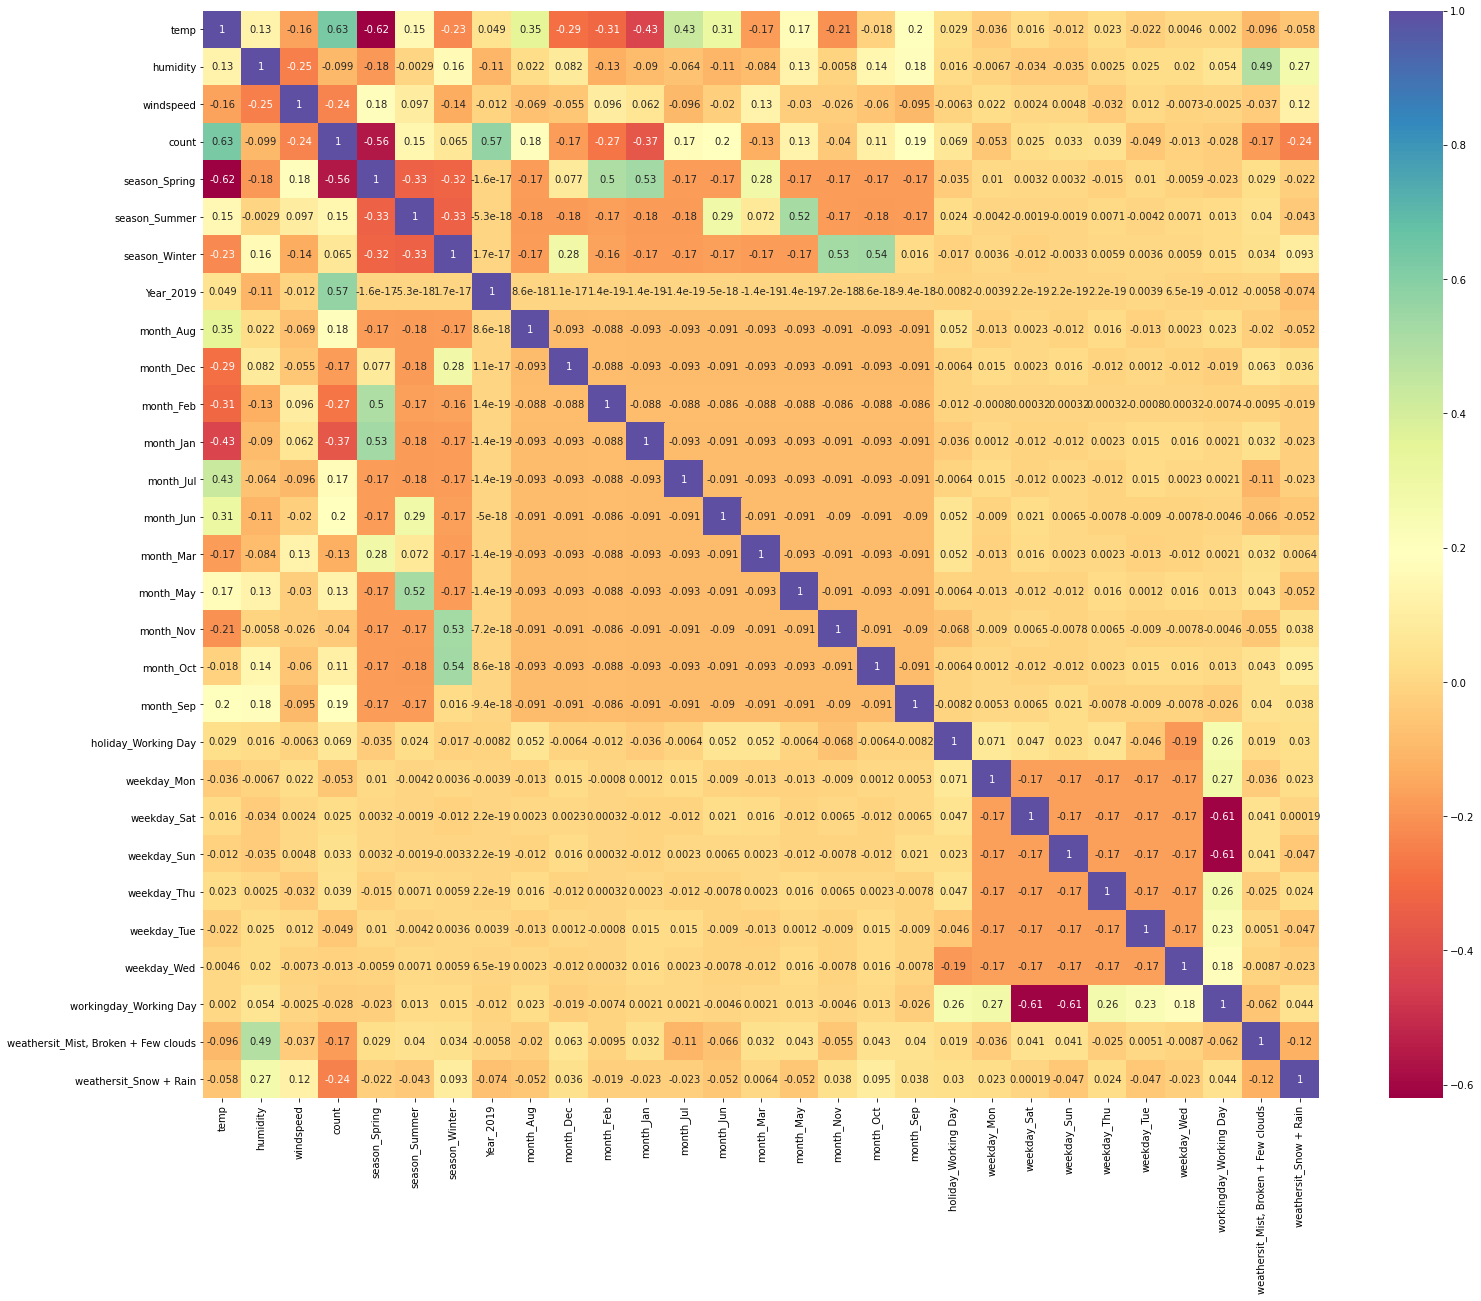

In [72]:
#Now lets check the correlation between variables again
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 20))
sns.heatmap(day.corr(), cmap='Spectral', annot = True)
plt.show()

# Scaling

Step 4: Splitting the day into Training and Testing Sets


Before model building, you first need to perform the test-train split and scale the features.

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
list(day.describe().columns)

['temp',
 'humidity',
 'windspeed',
 'count',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'Year_2019',
 'month_Aug',
 'month_Dec',
 'month_Feb',
 'month_Jan',
 'month_Jul',
 'month_Jun',
 'month_Mar',
 'month_May',
 'month_Nov',
 'month_Oct',
 'month_Sep',
 'holiday_Working Day',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thu',
 'weekday_Tue',
 'weekday_Wed',
 'workingday_Working Day',
 'weathersit_Mist, Broken + Few clouds',
 'weathersit_Snow + Rain']

By Choosing all the required Numerical Columns we can now continue woth day Scalign and day Modelling.. Let us denote these columns as VAR now.

In [75]:
var = ['temp', 'humidity', 'windspeed']
day[var] = scaler.fit_transform(day[var])

In [76]:
Z =day[var]

In [77]:
day.head()

temp  humidity  windspeed  count  season_Spring  season_Summer  \
0 -0.827613  1.252343  -0.387833    985              1              0   
1 -0.722069  0.480996   0.748899    801              1              0   
2 -1.635432 -1.338073   0.745931   1349              1              0   
3 -1.615560 -0.261577  -0.389769   1562              1              0   
4 -1.468226 -1.340294  -0.046477   1600              1              0   

   season_Winter  Year_2019  month_Aug  month_Dec  ...  holiday_Working Day  \
0              0          0          0          0  ...                    1   
1              0          0          0          0  ...                    1   
2              0          0          0          0  ...                    1   
3              0          0          0          0  ...                    1   
4              0          0          0          0  ...                    1   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  workingday_Working Day  weathersit_Mist, Broken + Few clouds  \
0            0                       1                                     1   
1            0                       1                                     1   
2            1                       1                                     0   
3            0                       1                                     0   
4            0                       1                                     0   

   weathersit_Snow + Rain  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 29 columns]

In [78]:
Z

temp  humidity  windspeed
0   -0.827613  1.252343  -0.387833
1   -0.722069  0.480996   0.748899
2   -1.635432 -1.338073   0.745931
3   -1.615560 -0.261577  -0.389769
4   -1.468226 -1.340294  -0.046477
..        ...       ...        ...
725 -1.319509  0.177576   2.059845
726 -1.324068 -0.264634  -0.452029
727 -1.324068  0.880424  -0.853182
728 -1.310404 -1.014341   2.067858
729 -1.529024 -0.352490  -0.460094

[730 rows x 3 columns]

# STEP 5: Model Building 

In [79]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test day set always have the same rows, respectively
#np.random.seed(0)
day_train, day_test = train_test_split(day, train_size = 0.7, random_state = 100)

In [80]:
#Rows and columns after split
print(day_train.shape)
print(day_test.shape)

(510, 29)
(220, 29)


Rescaling the Features


It is important to have all the variables on the same scale for the model to be easily interpretable. We can use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
    We will be using Standard Scaler Library.

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
list(day.describe().columns)

['temp',
 'humidity',
 'windspeed',
 'count',
 'season_Spring',
 'season_Summer',
 'season_Winter',
 'Year_2019',
 'month_Aug',
 'month_Dec',
 'month_Feb',
 'month_Jan',
 'month_Jul',
 'month_Jun',
 'month_Mar',
 'month_May',
 'month_Nov',
 'month_Oct',
 'month_Sep',
 'holiday_Working Day',
 'weekday_Mon',
 'weekday_Sat',
 'weekday_Sun',
 'weekday_Thu',
 'weekday_Tue',
 'weekday_Wed',
 'workingday_Working Day',
 'weathersit_Mist, Broken + Few clouds',
 'weathersit_Snow + Rain']

In [83]:
# ur cols - temp, hum, windspeed
var = ['temp','humidity','windspeed']
day[var] = scaler.fit_transform(day[var])

In [84]:
day.head()

temp  humidity  windspeed  count  season_Spring  season_Summer  \
0 -0.827613  1.252343  -0.387833    985              1              0   
1 -0.722069  0.480996   0.748899    801              1              0   
2 -1.635432 -1.338073   0.745931   1349              1              0   
3 -1.615560 -0.261577  -0.389769   1562              1              0   
4 -1.468226 -1.340294  -0.046477   1600              1              0   

   season_Winter  Year_2019  month_Aug  month_Dec  ...  holiday_Working Day  \
0              0          0          0          0  ...                    1   
1              0          0          0          0  ...                    1   
2              0          0          0          0  ...                    1   
3              0          0          0          0  ...                    1   
4              0          0          0          0  ...                    1   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  workingday_Working Day  weathersit_Mist, Broken + Few clouds  \
0            0                       1                                     1   
1            0                       1                                     1   
2            1                       1                                     0   
3            0                       1                                     0   
4            0                       1                                     0   

   weathersit_Snow + Rain  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 29 columns]

In [85]:
#Checking numeric variables(min and max) after scaling
day.head()

temp  humidity  windspeed  count  season_Spring  season_Summer  \
0 -0.827613  1.252343  -0.387833    985              1              0   
1 -0.722069  0.480996   0.748899    801              1              0   
2 -1.635432 -1.338073   0.745931   1349              1              0   
3 -1.615560 -0.261577  -0.389769   1562              1              0   
4 -1.468226 -1.340294  -0.046477   1600              1              0   

   season_Winter  Year_2019  month_Aug  month_Dec  ...  holiday_Working Day  \
0              0          0          0          0  ...                    1   
1              0          0          0          0  ...                    1   
2              0          0          0          0  ...                    1   
3              0          0          0          0  ...                    1   
4              0          0          0          0  ...                    1   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  workingday_Working Day  weathersit_Mist, Broken + Few clouds  \
0            0                       1                                     1   
1            0                       1                                     1   
2            1                       1                                     0   
3            0                       1                                     0   
4            0                       1                                     0   

   weathersit_Snow + Rain  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 29 columns]

Dividing into X and Y sets for the model building
`

In [86]:
#Divide the day into X and y
y_train = day_train.pop('count')
X_train = day_train

We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [87]:
X = day.drop('count', axis=1)
Y = day['count']

In [88]:
X.shape

(730, 28)

In [89]:
Y.shape

(730,)

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [91]:
X_train.shape

(584, 28)

In [92]:
X_test.shape

(146, 28)

In [93]:
Y_train.shape

(584,)

In [94]:
Y_test.shape

(146,)

In [95]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [96]:
regressor.coef_

array([  870.84771532,  -253.61860402,  -239.73835723,  -810.95174699,
          54.0187963 ,   649.14721019,  1930.12652509,  -146.06068639,
        -459.39702039,  -332.66649109,  -458.99852022,  -613.16936672,
        -127.45795636,    87.30298066,   211.23185129,  -548.24932305,
          59.23763089,   484.59604018,   968.22538078,  -198.75351395,
        -520.50413403,  -438.49262673,    46.6807705 ,  -190.91788894,
         -83.75133886,  -632.66948105,  -425.54248107, -1772.94094332])

In [97]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

In [98]:
coeff_df

Coefficient
temp                                   870.847715
humidity                              -253.618604
windspeed                             -239.738357
season_Spring                         -810.951747
season_Summer                           54.018796
season_Winter                          649.147210
Year_2019                             1930.126525
month_Aug                             -146.060686
month_Dec                             -459.397020
month_Feb                             -332.666491
month_Jan                             -458.998520
month_Jul                             -613.169367
month_Jun                             -127.457956
month_Mar                               87.302981
month_May                              211.231851
month_Nov                             -548.249323
month_Oct                               59.237631
month_Sep                              484.596040
holiday_Working Day                    968.225381
weekday_Mon                           -198.753514
weekday_Sat                           -520.504134
weekday_Sun                           -438.492627
weekday_Thu                             46.680771
weekday_Tue                           -190.917889
weekday_Wed                            -83.751339
workingday_Working Day                -632.669481
weathersit_Mist, Broken + Few clouds  -425.542481
weathersit_Snow + Rain               -1772.940943

In [99]:
y_train = day.pop('count')
X_train = day

In [100]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp','humidity','windspeed']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [101]:
# Check the parameters obtained

lr.params

const        4508.006849
temp         1210.635838
humidity     -438.852623
windspeed    -372.458701
dtype: float64

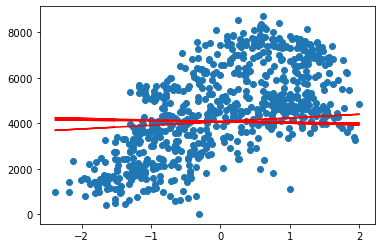

In [102]:
# Let's visualise the day with a scatter plot and the fitted regression line for temp
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 4080.348562 + 161.383993*X_train_lm.iloc[:, 1], 'r')
plt.plot(X_train_lm.iloc[:, 1], 4080.348562 - 30.844655*X_train_lm.iloc[:, 1], 'r')
plt.plot(X_train_lm.iloc[:, 1], 4080.348562 - 71.733160*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [103]:
print(regressor.intercept_)

3599.7206012885276


In [104]:
# Make predictions

Y_pred = regressor.predict(X_test)

In [105]:
cmp = pd.DataFrame({
    'Actual':Y_test,
    'Predicted':Y_pred
})
cmp

Actual    Predicted
196    5923  4053.640777
187    4592  4699.929247
14     1248  1123.210261
31     1360  1033.427099
390    4075  3658.722219
..      ...          ...
118    4595  4402.779055
566    4459  3656.224953
688    5634  5110.255082
266    5423  4901.613353
504    7129  6503.759368

[146 rows x 2 columns]

In [106]:
#(Residual Plot)

In [107]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 592.510308121291
Mean Squared Error: 573752.468510452
Root Mean Squared Error: 757.4644998351091


In [108]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.8704045149316655

In [109]:
# Adjusted r2

yhat = regressor.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8451821300927397 0.8389982494117079


In [110]:
yhat = regressor.predict(X_test)
SS_Residual = sum((Y_test-yhat)**2)
SS_Total = sum((Y_test-np.mean(Y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8704045149316654 0.8393902108127477


Text(0, 0.5, 'Y_pred')

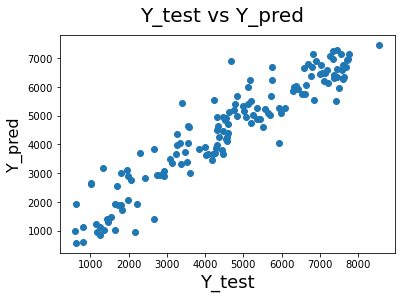

In [111]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_pred)
fig.suptitle('Y_test vs Y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('Y_test', fontsize = 18)                          # X-label
plt.ylabel('Y_pred', fontsize = 16)     

## RFE

In [112]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20) 
rfe = rfe.fit(X_train, y_train)

In [114]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 6),
 ('season_Winter', True, 1),
 ('Year_2019', True, 1),
 ('month_Aug', False, 4),
 ('month_Dec', True, 1),
 ('month_Feb', True, 1),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 8),
 ('month_Mar', False, 5),
 ('month_May', True, 1),
 ('month_Nov', True, 1),
 ('month_Oct', False, 7),
 ('month_Sep', True, 1),
 ('holiday_Working Day', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 9),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 3),
 ('workingday_Working Day', True, 1),
 ('weathersit_Mist, Broken + Few clouds', True, 1),
 ('weathersit_Snow + Rain', True, 1)]

In [115]:
X_train.columns[rfe.support_]

Index(['temp', 'humidity', 'windspeed', 'season_Spring', 'season_Winter',
       'Year_2019', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_May', 'month_Nov', 'month_Sep', 'holiday_Working Day',
       'weekday_Sat', 'weekday_Sun', 'weekday_Tue', 'workingday_Working Day',
       'weathersit_Mist, Broken + Few clouds', 'weathersit_Snow + Rain'],
      dtype='object')

In [116]:
len(X_train.columns[rfe.support_])

20

In [117]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

temp  humidity  windspeed  season_Spring  season_Winter  Year_2019  \
0 -0.827613  1.252343  -0.387833              1              0          0   
1 -0.722069  0.480996   0.748899              1              0          0   
2 -1.635432 -1.338073   0.745931              1              0          0   
3 -1.615560 -0.261577  -0.389769              1              0          0   
4 -1.468226 -1.340294  -0.046477              1              0          0   

   month_Dec  month_Feb  month_Jan  month_Jul  month_May  month_Nov  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
3          0          0          1          0          0          0   
4          0          0          1          0          0          0   

   month_Sep  holiday_Working Day  weekday_Sat  weekday_Sun  weekday_Tue  \
0          0                    1            0            0            0   
1          0                    1            0            0            1   
2          0                    1            0            0            0   
3          0                    1            0            0            0   
4          0                    1            0            0            0   

   workingday_Working Day  weathersit_Mist, Broken + Few clouds  \
0                       1                                     1   
1                       1                                     1   
2                       1                                     0   
3                       1                                     0   
4                       1                                     0   

   weathersit_Snow + Rain  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [118]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [119]:
# Running the linear model 
lm = sm.OLS(y_train,X_train_rfe).fit()

In [120]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.6
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          3.38e-271
Time:                        00:22:57   Log-Likelihood:                -5879.2
No. Observations:                 730   AIC:                         1.180e+04
Df Residuals:                     709   BIC:                         1.190e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Checking VIF

In [121]:
#Drop the constant term B0
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [122]:
def build_model(X,y):
    X = sm.add_constant(X) 
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) 
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [123]:
X_train_new = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     193.6
Date:                Sun, 03 Jan 2021   Prob (F-statistic):          3.38e-271
Time:                        00:22:58   Log-Likelihood:                -5879.2
No. Observations:                 730   AIC:                         1.180e+04
Df Residuals:                     709   BIC:                         1.190e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [124]:
checkVIF(X_train_new)

Features    VIF
18                workingday_Working Day  63.74
0                                  const  49.61
15                           weekday_Sat  36.55
16                           weekday_Sun  35.98
14                   holiday_Working Day   7.12
4                          season_Spring   3.90
1                                   temp   3.73
5                          season_Winter   2.37
9                              month_Jan   2.27
2                               humidity   2.05
8                              month_Feb   2.01
12                             month_Nov   1.73
19  weathersit_Mist, Broken + Few clouds   1.63
7                              month_Dec   1.59
10                             month_Jul   1.41
20                weathersit_Snow + Rain   1.32
11                             month_May   1.22
3                              windspeed   1.19
13                             month_Sep   1.17
17                           weekday_Tue   1.08
6                              Year_2019   1.04

# Step 6: Residual Analysis of the train data


In [125]:
y_train_cnt = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

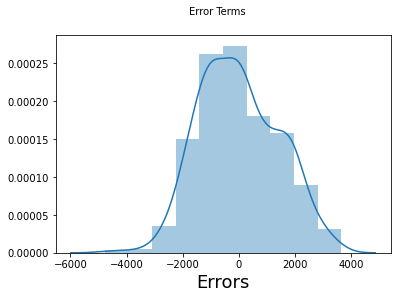

In [126]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 10)
fig.suptitle('Error Terms', fontsize = 10)                  
plt.xlabel('Errors', fontsize = 18)                        

# THANK YOU